## For issue
```
Failed to get convolution algorithm. This is probably because cuDNN failed to initialize,
```

In [1]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
#Mobile Net v2
from keras.applications.mobilenet_v2 import MobileNetV2

model = MobileNetV2(input_shape=(224, 224, 3))
model.summary()

Using TensorFlow backend.
/home/kung/anaconda3/envs/MobileNetV2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kung/anaconda3/envs/MobileNetV2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kung/anaconda3/envs/MobileNetV2/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kung/

Instructions for updating:
Colocations handled automatically by placer.


2021-12-02 01:30:02.520631: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-12-02 01:30:02.544920: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 4000140000 Hz
2021-12-02 01:30:02.545320: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55826cdf3b00 executing computations on platform Host. Devices:
2021-12-02 01:30:02.545348: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2021-12-02 01:30:02.683995: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-02 01:30:02.684402: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1433] Found device 0 with properties: 
name: NVIDIA GeForce RTX 2080 major: 7 minor: 5 memoryClockRate(GHz)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [3]:
from keras.models import Model

model2 = Model(inputs=model.input, outputs=model.get_layer("global_average_pooling2d_1").output)
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [4]:
from keras.layers import Dense, Activation

model3_fc2 = Dense(5, activation=None)(model2.output)
#model3_output = Activation('softmax')(model3_fc2)

model57 = Model(inputs=model2.input, outputs=model3_fc2)
model57.summary()

model57.save('model57.h5')


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

/home/kung/anaconda3/envs/MobileNetV2/lib/python3.7/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


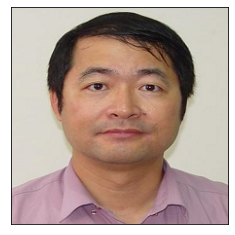

2021-12-02 01:30:23.470835: I tensorflow/stream_executor/dso_loader.cc:152] successfully opened CUDA library libcublas.so.10.0 locally


[[-0.7112766  -1.62958    -0.07701772 -0.1831905   1.2716126 ]]


In [5]:
# test predict output
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt


model = load_model('model57.h5')

#im = cv2.cvtColor(cv2.imread('../images/one_bike_many_cars_224x224.bmp'), cv2.COLOR_BGR2RGB)
im = cv2.cvtColor(cv2.imread('../images/man.bmp'), cv2.COLOR_BGR2RGB)
#im = cv2.cvtColor(cv2.imread('../images/testG.bmp'), cv2.COLOR_BGR2RGB)

im2 = im.reshape((1, 224, 224, 3))

# 因為在batch_compile的過程中我們設定"img_preprocess_method"="kneron"，所以影像需要做以下處理
im3 = im2.astype(np.float)
im3 = im3 / 256.0
im3 = im3 - 0.5

plt.imshow(im)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()



print(model.predict(im3))
